In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

#### **Abalones are very rare sea-species..It is  as valuable as jewellery....many people believes that it brings many positive sense to a house where it kept in...the value of the Abalones are depends on the Number of rings it has..

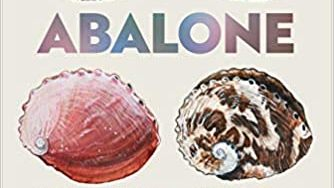

Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description
-----------------------------

Sex : nominal / -- / M, F, and I (infant)

Length : continuous / mm / Longest shell measurement

Diameter : continuous / mm / perpendicular to length

Height : continuous / mm / with meat in shell

Whole weight : continuous / grams / whole abalone

Shucked weight : continuous / grams / weight of meat

Viscera weight : continuous / grams / gut weight (after bleeding)

Shell weight : continuous / grams / after being dried

Rings : integer / -- / +1.5 gives the age in years


The readme file contains attribute statistics.




## Task : 
### I have to find the Number of Rings(age) of the Abalones with the help of independent features

In [4]:
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv('abalone.data',sep=',')
df.shape

(4176, 9)

In [5]:
df.columns = ['Sex','Length','Diameter','Height','WholeWt','ShuckedWt','VisceraWt','ShellWt','Rings']

In [6]:
df.head(2)

,Sex,Length,Diameter,Height,WholeWt,ShuckedWt,VisceraWt,ShellWt,Rings
0,M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
1,F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [8]:
d = pd.get_dummies(df['Sex'],1)

In [9]:
d.columns = ['Female','Infant','Male']

In [10]:
df1 = pd.concat([d,df],1)

In [11]:
df1.drop('Sex',1,inplace=True)

In [12]:
df1.head(2)

,Female,Infant,Male,Length,Diameter,Height,WholeWt,ShuckedWt,VisceraWt,ShellWt,Rings
0,0,0,1,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
1,1,0,0,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


## EDA

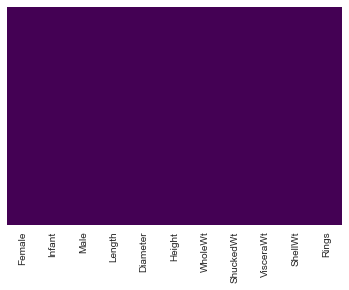

In [13]:
sns.heatmap(df1.isnull(),cbar=False,cmap='viridis',yticklabels=False,linecolor='white')
plt.show()

** Showing no Null Values

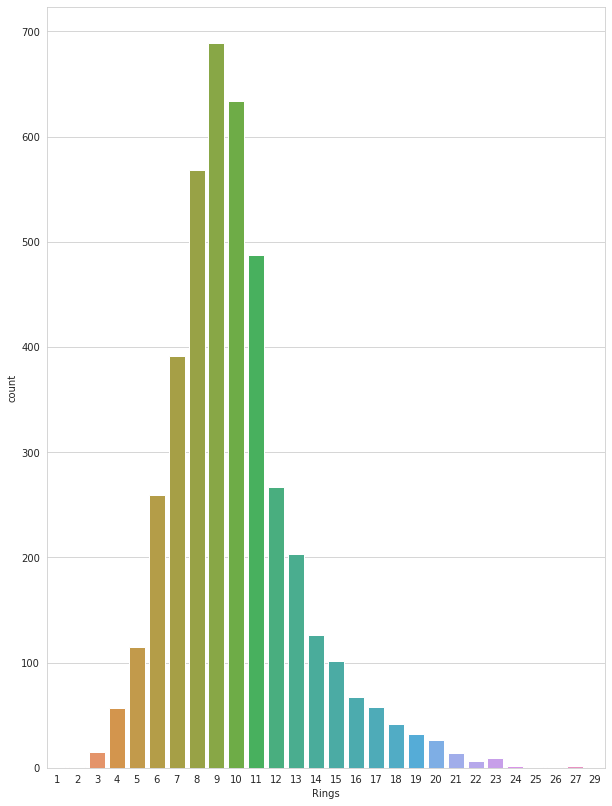

In [11]:
plt.figure(figsize=(10,14))
sns.countplot(df1['Rings'])
plt.show()

* Conclussion:-
    
  Number of classes of the 'Rings' are not equaly distributed ,some classes are very high however some are very few. So, inspite of classification model it will be better to go for regression model..

In [16]:
l = list(df1.Rings.unique())

In [17]:
np.sort(l)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29], dtype=int64)

In [18]:
len(l)

28

* Pearson Co-relation with 'Rings'

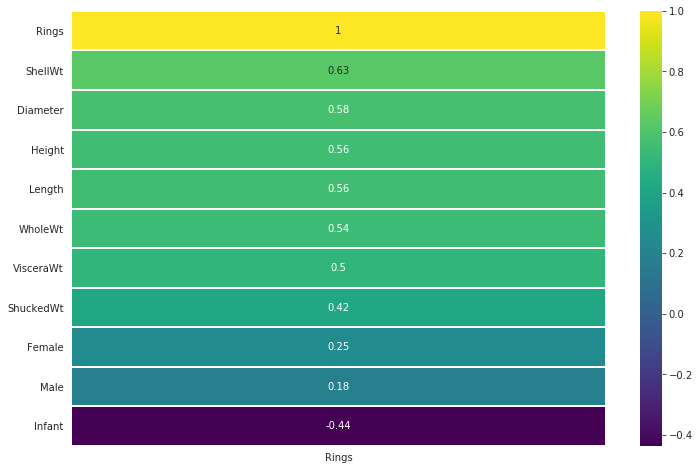

In [15]:
cor = df1.corr()[['Rings']].sort_values(by='Rings',ascending=False)
plt.figure(figsize= (12,8))
sns.heatmap(cor,annot=True,linewidths=1,cmap='viridis')
plt.show()

* Pearson Co-relation between all

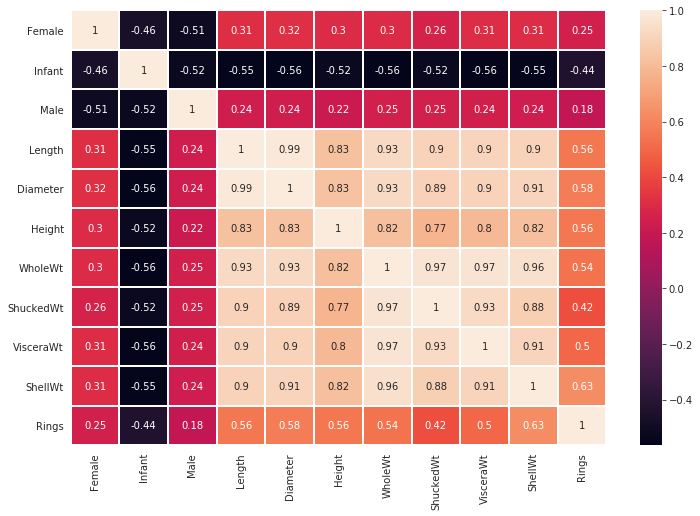

In [16]:
plt.figure(figsize= (12,8))
sns.heatmap(df1.corr(),annot=True,linewidths=1)
plt.show()

       Distribution-plot                                 Box-plot                      Scatter-plot


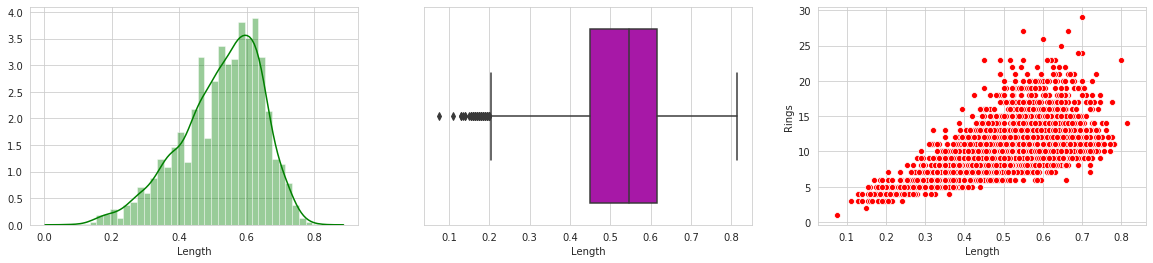

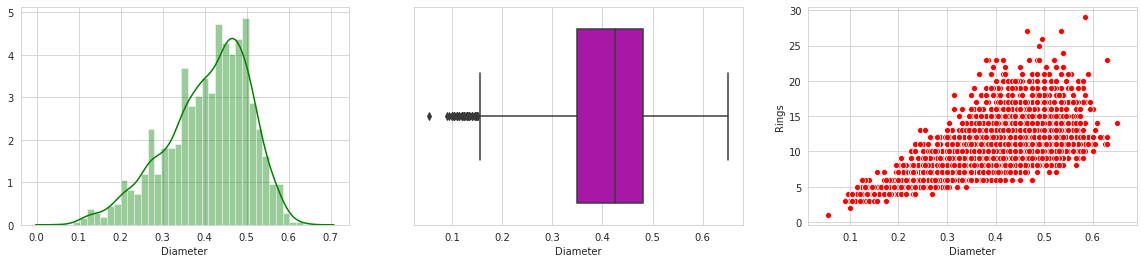

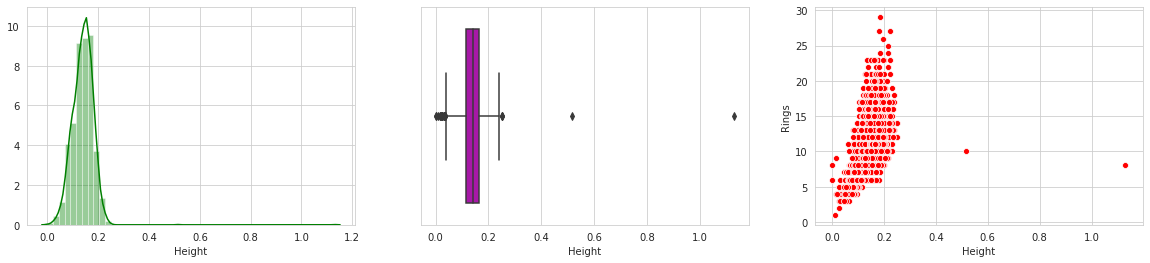

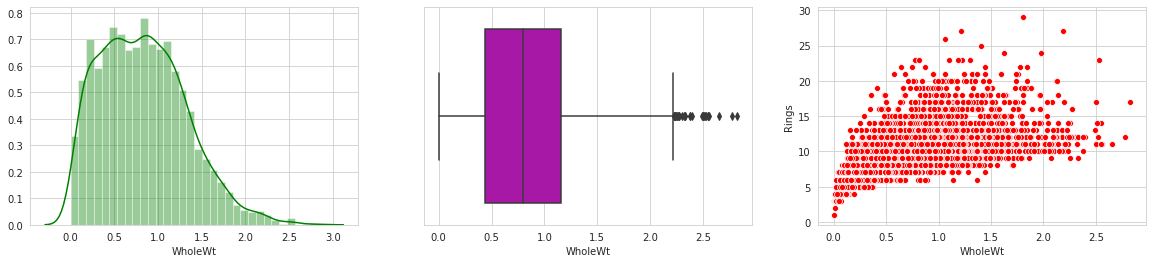

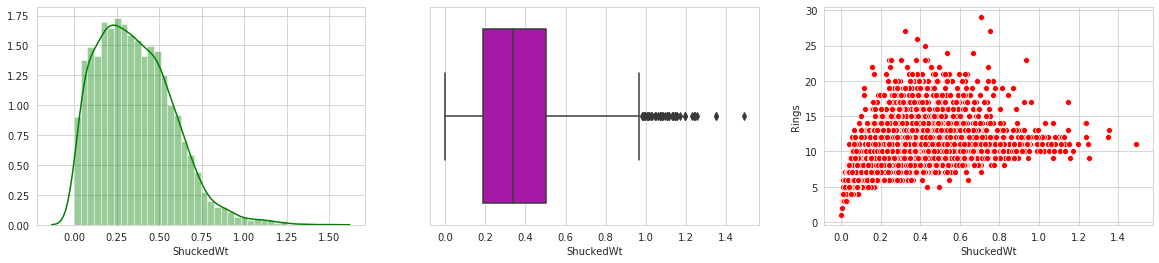

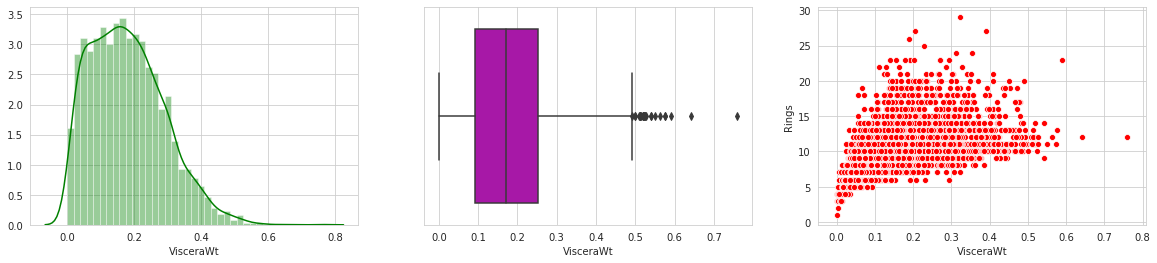

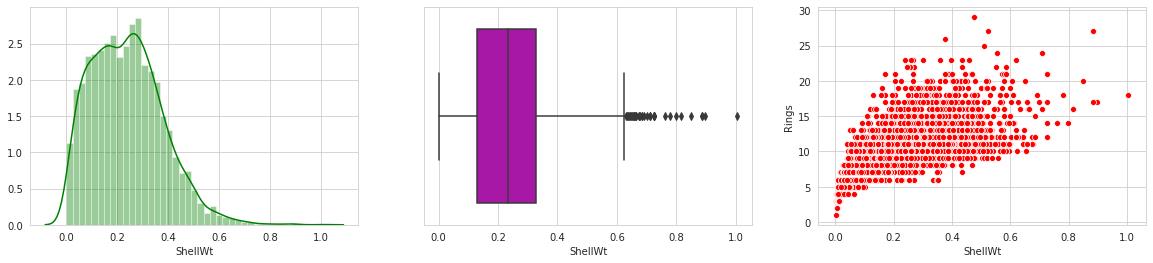

In [17]:
print('       Distribution-plot                                 Box-plot                      Scatter-plot')
for i in range(3,(len(df1.columns)-1)):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,4))
    a = df1[df1.columns[i]]
    b = df1['Rings']
    sns.distplot(a,color='g',ax=ax1)
    sns.boxplot(a,color='m',ax=ax2)
    sns.scatterplot(a,b,color='r',ax=ax3)

In [18]:
df1.describe()

,Female,Infant,Male,Length,Diameter,Height,WholeWt,ShuckedWt,VisceraWt,ShellWt,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.312979,0.321360,0.365661,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.463761,0.467055,0.481673,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,1.000000,1.000000,1.000000,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


* here max value of independent feature(WholeWt) is 2.8255 amongst all other ind. features so, I need not to scale the data more

In [19]:
del df

In [20]:
df1.head(2)

,Female,Infant,Male,Length,Diameter,Height,WholeWt,ShuckedWt,VisceraWt,ShellWt,Rings
0,0,0,1,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
1,1,0,0,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


### *Removing some outliers by DBSCAN transformation

In [21]:
x = df1.iloc[:,3:10]
x.head(2)

,Length,Diameter,Height,WholeWt,ShuckedWt,VisceraWt,ShellWt
0,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.07
1,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.21


In [22]:
from sklearn.cluster import DBSCAN

In [23]:
scan = DBSCAN(eps=0.14, min_samples=3)
model = scan.fit(x)
index = scan.core_sample_indices_

print("data to be cleaned :",(len(df1)-len(index)))

data to be cleaned : 42


In [24]:
Df = df1.iloc[index].reset_index(drop=True).copy()

In [25]:
len(Df),len(df1) #data is cleaned

(4134, 4176)

In [26]:
del df1

       Distribution-plot                                 Box-plot                      Scatter-plot


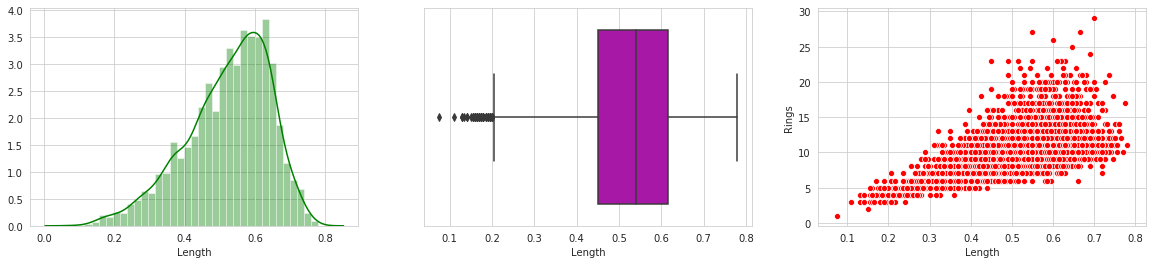

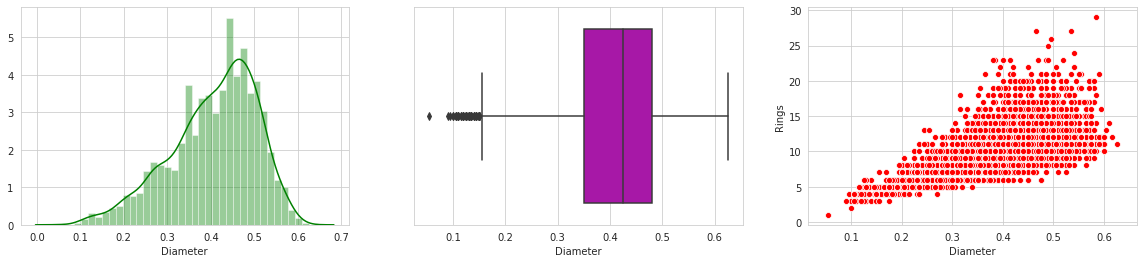

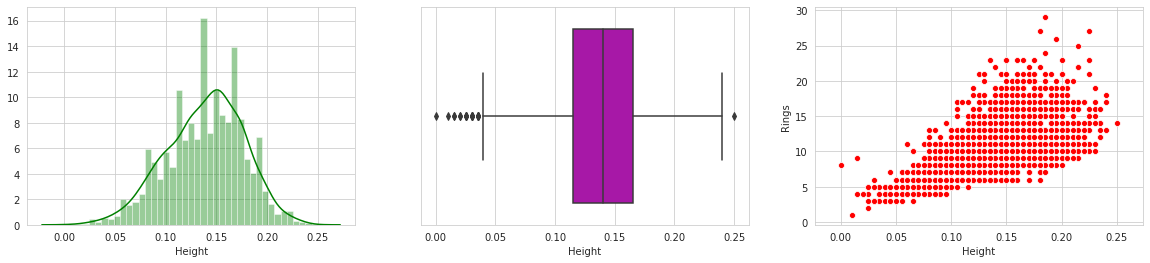

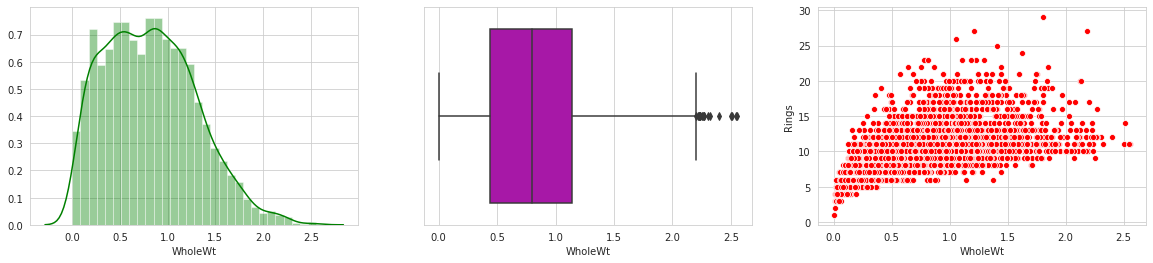

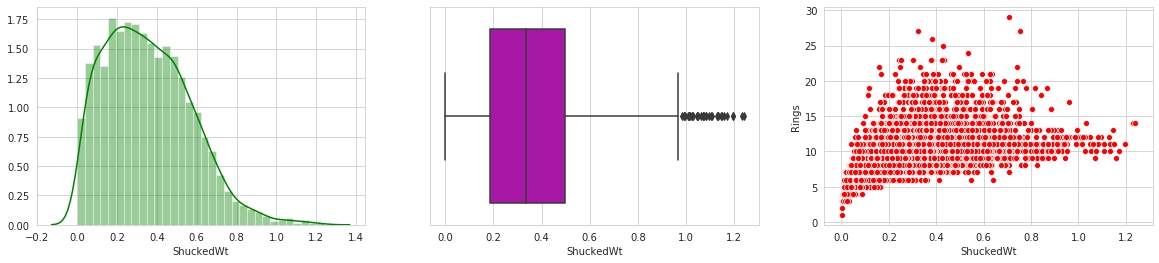

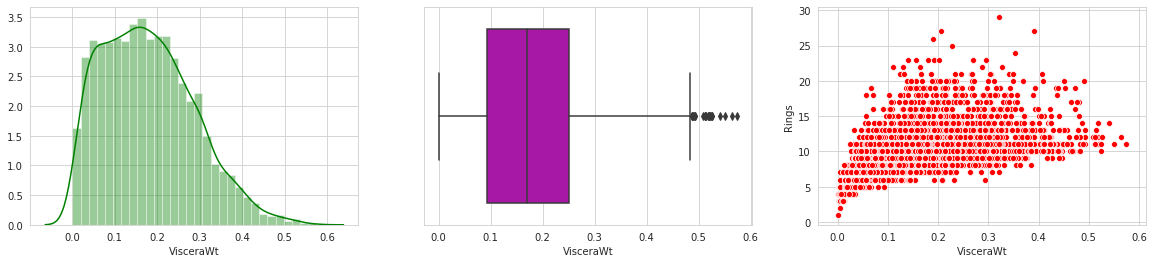

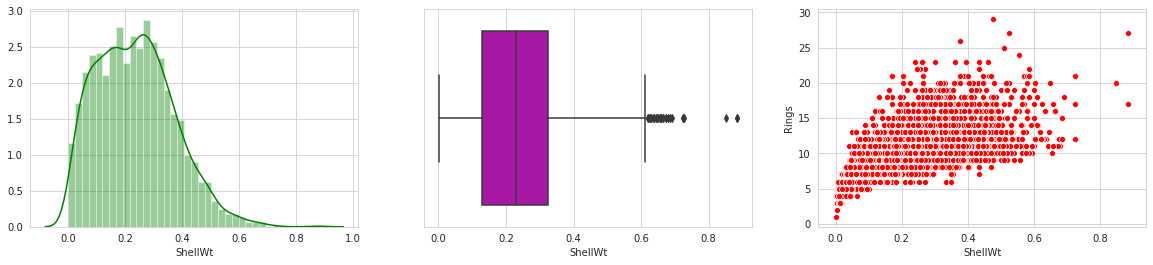

In [27]:
print('       Distribution-plot                                 Box-plot                      Scatter-plot')
for i in range(3,(len(Df.columns)-1)):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,4))
    a = Df[Df.columns[i]]
    b = Df['Rings']
    sns.distplot(a,color='g',ax=ax1)
    sns.boxplot(a,color='m',ax=ax2)
    sns.scatterplot(a,b,color='r',ax=ax3)

* Now these plots are seems better than previous(un-cleaned) Data sets

In [28]:
#Seperating the data sets into independent and dependent features say->X,y
y = Df[['Rings']].copy()
X = Df.drop('Rings',1).copy()

In [29]:
del Df

In [30]:
X.shape,y.shape

((4134, 10), (4134, 1))

### LASSO FEATURE SELECTION/FEATURE IMPORTANCE

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso = Lasso(alpha=0.008)
lasso.fit(X,y)
lasso.coef_

array([  0.        ,  -0.93765734,   0.        ,   0.28292043,
         7.07034037,   0.        ,   4.991077  , -15.75028756,
        -0.        ,  13.07396699])

In [33]:
coeff_values = pd.DataFrame({'coeff':lasso.coef_},index=X.columns).sort_values(by='coeff')
c = (abs(coeff_values.coeff) > 0)
col_imp = list(X.columns[c])
len(col_imp)

6

In [34]:
col_imp

['Female', 'Infant', 'WholeWt', 'ShuckedWt', 'VisceraWt', 'ShellWt']

In [35]:
X1 = X[col_imp].copy()
X1.head(2)

,Female,Infant,WholeWt,ShuckedWt,VisceraWt,ShellWt
0,0,0,0.2255,0.0995,0.0485,0.07
1,1,0,0.6770,0.2565,0.1415,0.21


#### saving csv data sets

In [36]:
X1.to_csv('X.csv',index=False)

In [37]:
y.to_csv('y.csv',index=False)

In [38]:
del X,X1,y

#### opening data sets

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [57]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [58]:
X = X.values

In [59]:
y = y.values

In [60]:
X.shape,y.shape

((4134, 6), (4134, 1))

## Making ANN Regression Model

In [61]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [62]:
import keras
keras.__version__

'2.3.1'

In [63]:
if tf.test.is_gpu_available():
    print('GPU')
else:
    print('CPU')

GPU


In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
xtrain.shape,xtest.shape

((3307, 6), (827, 6))

In [66]:
batch_size = 20
buffer_size = 100

In [67]:
training_dataset = tf.data.Dataset.from_tensor_slices((xtrain,ytrain)).batch(batch_size).shuffle(100)
training_dataset = training_dataset.repeat()

In [68]:
testing_dataset = tf.data.Dataset.from_tensor_slices((xtest,ytest)).batch(batch_size).shuffle(100)
testing_dataset = training_dataset.repeat()

In [69]:
#Now in the fit() function, we can pass the dataset directly in, as follows:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=xtrain.shape[1],batch_size=batch_size),
    tf.keras.layers.Dense(64,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation=tf.nn.relu),
    tf.keras.layers.Dense(16,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.relu)
])

In [70]:
steps_per_epoch = len(xtrain)//batch_size #required becuase of the repeat() on the dataset
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile (optimizer= opt,loss='mse')

In [71]:
hist = model.fit(training_dataset, epochs=250, steps_per_epoch=steps_per_epoch,
          validation_data=testing_dataset,validation_steps=2)

Train for 165 steps, validate for 2 steps
Epoch 1/250
165/165 [==============================] - 1s 5ms/step - loss: 85.9396 - val_loss: 48.4780
Epoch 2/250
165/165 [==============================] - 0s 3ms/step - loss: 15.3922 - val_loss: 9.2732
Epoch 3/250
165/165 [==============================] - 0s 3ms/step - loss: 9.8432 - val_loss: 8.4328
Epoch 4/250
165/165 [==============================] - 0s 2ms/step - loss: 9.0274 - val_loss: 3.5568
Epoch 5/250
165/165 [==============================] - 0s 2ms/step - loss: 8.5813 - val_loss: 7.2824
Epoch 6/250
165/165 [==============================] - 0s 2ms/step - loss: 8.1534 - val_loss: 3.3000
Epoch 7/250
165/165 [==============================] - 0s 2ms/step - loss: 7.6442 - val_loss: 5.6970
Epoch 8/250
165/165 [==============================] - 0s 2ms/step - loss: 7.2094 - val_loss: 3.9083
Epoch 9/250
165/165 [==============================] - 0s 2ms/step - loss: 6.8308 - val_loss: 3.8008
Epoch 10/250
165/165 [========================

Epoch 81/250
165/165 [==============================] - 1s 4ms/step - loss: 4.3315 - val_loss: 1.6918
Epoch 82/250
165/165 [==============================] - 1s 4ms/step - loss: 4.5932 - val_loss: 2.6909
Epoch 83/250
165/165 [==============================] - 1s 4ms/step - loss: 4.3184 - val_loss: 3.6218
Epoch 84/250
165/165 [==============================] - 1s 4ms/step - loss: 4.6127 - val_loss: 10.7745
Epoch 85/250
165/165 [==============================] - 1s 4ms/step - loss: 4.6386 - val_loss: 3.6042
Epoch 86/250
165/165 [==============================] - 1s 5ms/step - loss: 4.5919 - val_loss: 2.9377
Epoch 87/250
165/165 [==============================] - 1s 4ms/step - loss: 4.3634 - val_loss: 7.9785
Epoch 88/250
165/165 [==============================] - 1s 4ms/step - loss: 4.5172 - val_loss: 3.1174
Epoch 89/250
165/165 [==============================] - 1s 4ms/step - loss: 4.5032 - val_loss: 3.2980
Epoch 90/250
165/165 [==============================] - 1s 4ms/step - loss: 4.716

165/165 [==============================] - 1s 5ms/step - loss: 4.3169 - val_loss: 2.5287
Epoch 240/250
165/165 [==============================] - 1s 4ms/step - loss: 4.2299 - val_loss: 4.4930
Epoch 241/250
165/165 [==============================] - 1s 5ms/step - loss: 4.1262 - val_loss: 5.0524
Epoch 242/250
165/165 [==============================] - 1s 5ms/step - loss: 4.4296 - val_loss: 2.5218
Epoch 243/250
165/165 [==============================] - 1s 4ms/step - loss: 4.0988 - val_loss: 4.4522
Epoch 244/250
165/165 [==============================] - 1s 4ms/step - loss: 4.5847 - val_loss: 3.7296
Epoch 245/250
165/165 [==============================] - 1s 4ms/step - loss: 3.8704 - val_loss: 6.4048
Epoch 246/250
165/165 [==============================] - 1s 4ms/step - loss: 4.4654 - val_loss: 3.5200
Epoch 247/250
165/165 [==============================] - 1s 4ms/step - loss: 4.1906 - val_loss: 5.5769
Epoch 248/250
165/165 [==============================] - 1s 4ms/step - loss: 4.2839 - v

In [72]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

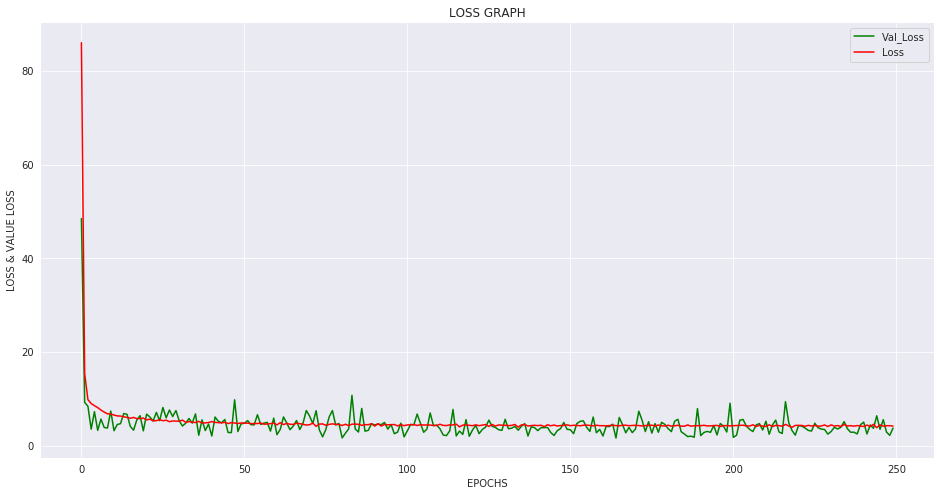

In [73]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(16,8))
plt.plot(np.arange(len(hist.history['val_loss'])),hist.history['val_loss'],'-g',label='Val_Loss')
plt.plot(np.arange(len(hist.history['loss'])),hist.history['loss'],c='r',label='Loss')
plt.title('LOSS GRAPH')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS & VALUE LOSS')
plt.legend()
sns.despine(left=True)
plt.show()

In [74]:
del X,x,xtrain,ytrain,xtest,ytest

#### Saving Model

In [75]:
model.save('Abalone_NN.h5') 
del model 

#### Loading Model

In [76]:
from tensorflow.keras.models import load_model
model = load_model('Abalone_NN.h5')   

In [84]:
X = pd.read_csv('X.csv')

## Predicting from any index of independent features(X)

In [86]:
def prediction(data = X):
    try:
        index = int(input("Enter any Index   : "))
        p = model.predict(data.iloc[[index]].values).round()[0]
        ring = np.int(p)
        print('\n')
        print('Predicted Number of Rings:',ring)
    except:
        print('\nindex Error...')
        print(f'Enter index value within: {len(X)-1}   You have Entered: {index}..')

In [87]:
prediction()

Enter any Index   : 4200

index Error...
Enter index value within: 4133   You have Entered: 4200..


In [88]:
prediction()

Enter any Index   : 520


Predicted Number of Rings: 9


#### -------------------------------------END---------------------------------------